In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

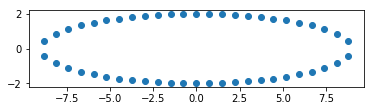

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [5]:
def draw_line(coef,intercept, X):
    
    y_pred = X * coef + intercept
    plt.plot(X,y_pred)    
    

In [6]:
def applyRegressor(alpha_range, outliers, X, Y):    
    
    plot_ctr = 0
    plt.figure(figsize=(20,15))
    
    for alpha in alpha_range:
        
        x_with_outlier = X
        y_with_outlier = Y
        
        for outlier in outliers:
            
            plot_ctr  += 1
            
            x_with_outlier = np.append(x_with_outlier, outlier[0])
            x_with_outlier = x_with_outlier.reshape(-1, 1)           

            y_with_outlier = np.append(y_with_outlier, outlier[1])
            y_with_outlier = y_with_outlier.reshape(-1, 1)
                        

            clf = SGDRegressor(loss='squared_loss', alpha=alpha, eta0=0.001, learning_rate='constant',random_state=0)            
            clf.fit(x_with_outlier, y_with_outlier)
            
           
            #print(clf.coef_)
            #print(clf.intercept_)
            
            plt.subplot(len(alpha_range), len(outliers), plot_ctr)            
            plt.scatter(x_with_outlier,y_with_outlier, s=20, color='black')
            
            #new_x = np.array([np.min(x_with_outlier), np.max(x_with_outlier)])            
            #new_y = np.array([np.min(y_with_outlier), np.max(y_with_outlier)])
            
            
            
            draw_line(clf.coef_, clf.intercept_, x_with_outlier)
            
            
            
            
            plt.title('SGDRegressor with alpha = ' + str(alpha))

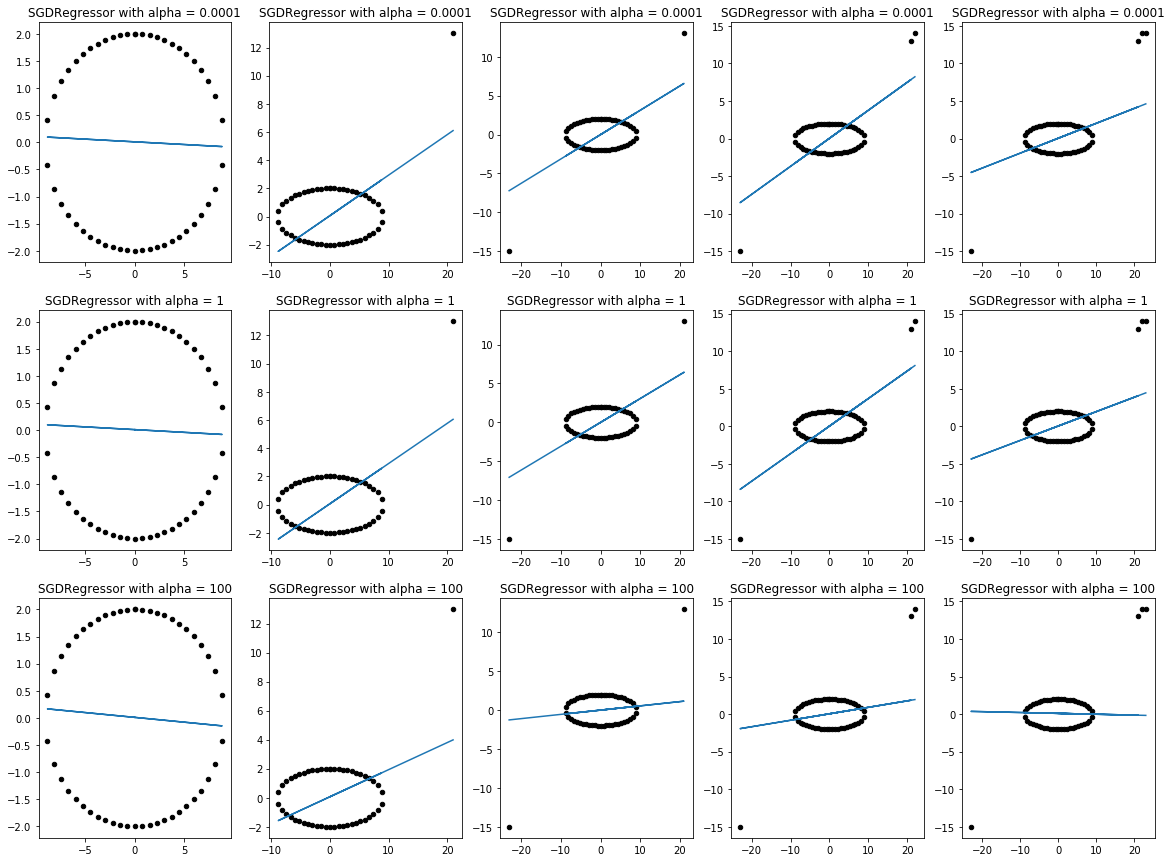

In [7]:
alpha_range = [0.0001, 1, 100]
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]

applyRegressor(alpha_range, outliers, X, Y)

<pre><b><font style='color:red'>Observation:</font>
<font style='color:green'>Here we can see that after train model with alpha = [0.0001, 1, 100] and 
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] the best fit line I got is with alpha=100 
which is in the last subplot.</font>
</b></pre>